In [11]:
import numpy as np
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import cv2
from sklearn.model_selection import train_test_split
import os

sign_names_df = pd.read_csv('signnames.csv', index_col=0)

def load_data(directory='traffic-signs-data/', train_file='train.p', test_file='test.p'):
    train = pd.read_pickle('{0}{1}'.format(directory, train_file))
    test = pd.read_pickle('{0}{1}'.format(directory, test_file))
    return train, test
    
def visualize_class_size(y):
    """
    Shows how many of each sign type are in the data set
    """
    # plt.imshow(train['features'][3620])
    # plt.imshow(train['features'][5620])
    plt.bar(np.unique(y), np.bincount(y))
    plt.show()

def show_signs_with_names(signs=10):
    for ix in range(0, signs):
        rnd = np.random.choice(np.arange(len(X_train_begin)))
        print(sign_names_df.loc[y_train_begin[rnd]]['SignName'])
        plt.imshow(X_train_begin[rnd])
        plt.show()

def dataset_summary():
    ### Replace each question mark with the appropriate value.
    # TODO: Number of training examples
    n_train = len(X_train_begin)

    # TODO: Number of testing examples.
    n_test = len(X_test)

    # TODO: What's the shape of an traffic sign image?
    image_shape = X_train_begin[0].shape

    # TODO: How many unique classes/labels there are in the dataset.
    n_classes = len(np.unique(y_test))

    print("Number of training examples =", n_train)
    print("Number of testing examples =", n_test)
    print("Image data shape =", image_shape)
    print("Number of classes =", n_classes)
    
def rotate(img):
    new_rot = cv2.getRotationMatrix2D((img.shape[1]/2, img.shape[0]/2), np.random.choice([-10,10]), 1)
    new_img = cv2.warpAffine(img, new_rot, (img.shape[1], img.shape[0]))
    return new_img

def normalize_images(img_set):
    return (img_set - img_set.mean()) / np.std(img_set)

In [2]:
"""
Loads the initial data sets. Don't rerun this,
just run the next cell to get the data we use in training
"""
train, test = load_data()
X_train_begin, y_train_begin = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
X_train_begin = normalize_images(X_train_begin)
X_test = normalize_images(X_test)
"""clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
for ix in range(0, len(X_train_begin)):
    # Normalize images RGB / Brightness / Contrast
    img = X_train_begin[ix]
    plt.imshow(img)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    plt.imshow(img)
    #cl1 = clahe.apply(img)
    print(cl1)
    #plt.imshow(img)
    break"""
print('Done...')

Done...


In [3]:
dataset_summary() # to get some info about the data

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Road work


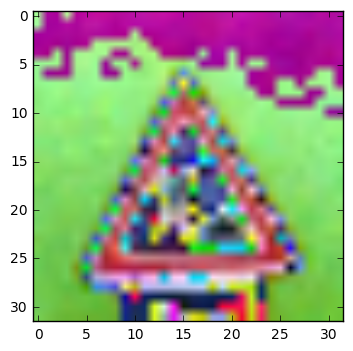

Speed limit (70km/h)


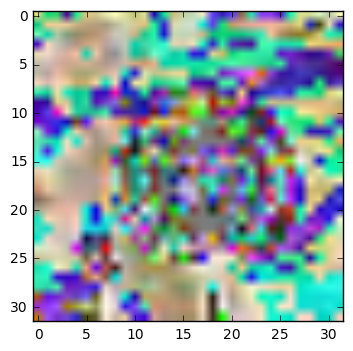

Speed limit (100km/h)


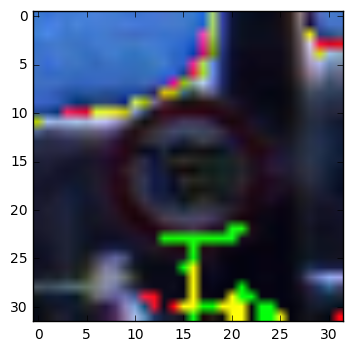

Wild animals crossing


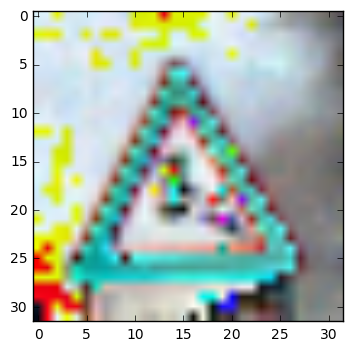

Go straight or right


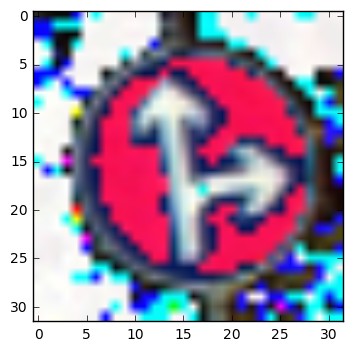

In [4]:
show_signs_with_names(5)

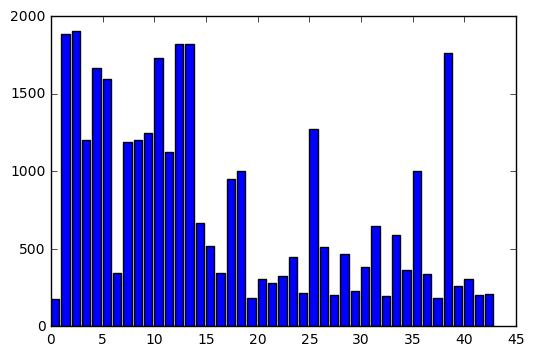

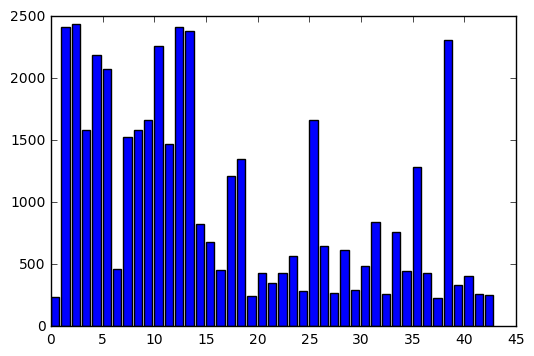

Done...


In [5]:
"""
Using Scikit Learn's train_test_split to get a training and validation set
Using train size 80%, test 20%
"""

X_train, X_validation, y_train, y_validation = train_test_split(list(X_train_begin), list(y_train_begin), test_size=.15, random_state=43)

# visualize_class_size(y_train)
# print(np.bincount(y_train))
# Generate new rotated images:
visualize_class_size(y_train) # To visualize how many of each class
for ix in range(0, 10000):
    pick = np.random.choice(len(y_train))
    img_copy = X_train[pick].copy()
    img_copy = rotate(img_copy)
    X_train.append(img_copy)
    y_train.append(y_train[pick])
# print(np.bincount(y_train))
visualize_class_size(y_train)
print('Done...')
# Normalize the data
# X_train = X_train/255.
# X_validation = X_validation/255.



    

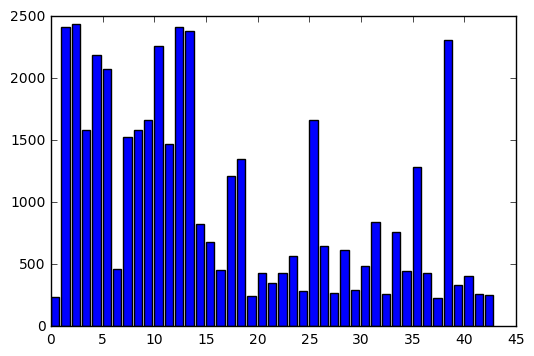

In [6]:
visualize_class_size(y_train)

In [7]:
def traffic_sign_model(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # keep_prob = tf.placeholder(tf.float32)
    conv1_drop = tf.nn.dropout(conv1, keep_prob)
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1_drop, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

"""
Model evaluation
"""

def evaluate(X_data, y_data, prob):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: prob})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [8]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
# Data set is one hot encoded
one_hot_y = tf.one_hot(y, 43)

# Hyperparameters
# Learning rate for AdamOptimizer
rate = 1e-3
# How many times to train the network
EPOCHS = 15
# How many
BATCH_SIZE = 128

logits = traffic_sign_model(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [9]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...{0}".format(num_examples))
    print()
    for i in range(EPOCHS):
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        print('Validating...')
        validation_accuracy = evaluate(X_validation, y_validation, 0.5)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        if validation_accuracy > 0.97:
            break
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'traffic_signs')
    print("Model saved")

Training...43327

Validating...
EPOCH 1 ...
Validation Accuracy = 0.670
Validating...
EPOCH 2 ...
Validation Accuracy = 0.795
Validating...
EPOCH 3 ...
Validation Accuracy = 0.841
Validating...
EPOCH 4 ...
Validation Accuracy = 0.868
Validating...
EPOCH 5 ...
Validation Accuracy = 0.880
Validating...
EPOCH 6 ...
Validation Accuracy = 0.894
Validating...
EPOCH 7 ...
Validation Accuracy = 0.902
Validating...
EPOCH 8 ...
Validation Accuracy = 0.918
Validating...
EPOCH 9 ...
Validation Accuracy = 0.918
Validating...
EPOCH 10 ...
Validation Accuracy = 0.923
Validating...
EPOCH 11 ...
Validation Accuracy = 0.927
Validating...
EPOCH 12 ...
Validation Accuracy = 0.926
Validating...
EPOCH 13 ...
Validation Accuracy = 0.930
Validating...
EPOCH 14 ...
Validation Accuracy = 0.933
Validating...
EPOCH 15 ...
Validation Accuracy = 0.944
Model saved


In [10]:
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('traffic_signs.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    test_acc = evaluate(X_test, y_test, 1.0)
    print("Test Accuracy = {:.3f}".format(test_acc))

Test Accuracy = 0.919


# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

Done

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

We can see that there are a lot of labels that are not well represented here


Done

# Uncommented the visualizations so you can see them


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes(aka labels) and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

Did a train/test split for a validation piece of our test set. Shuffling happens during the train/test split in scikit-learn, so I took out my shuffle.

I saw that there were a lot of labels that were under represented, so we need to generate more data for those
labels. Didn't end up implementing this because if you expect to see more 20km/hr signs, I would prefer the
model labels toss-ups as 20km/hr vs some random sign. 

I did however add 10000 rotated images to the dataset, and picked randomly which to add, so that it added representative amounts to each data set, after adding the image I took the same index in my target(y) variable and appended that as well to match the "new" image classification.

I tried grayscale to no avail. I think overall that a grayscale model could be more robust, but at the same time I also think the colors play a role in finding the correct sign. In the US, for example, colors are unique and stay the same for each sign. I prefer to keep the colors so that we can properly identify these signs better. Overall this would harm my project if I was doing it for something like a dog, where the variations and new dogs are infinite, but the set of signs in a country is finite. 

I did normalize the data with the normalize_images() function.

Did one dropout layer to avoid overfitting.


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

Used sklearn's train_test_split, did 20% validation piece of the original train set

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

Using the LeNet architecture -

Image --> Convolution --> Max Pool --> Convolution --> Max Pool --> Fully Connected...

The Architecture looks like this:

Convolution layer 1. The output shape should be 28x28x6. I used a filter with the shape (5, 5, 1, 6) with VALID padding to get to this.

Activation 1. Standard ReLU activation

Pooling layer 1. The output shape is 14x14x6.

Convolution layer 2. The output shape is 10x10x16.

Activation 2. ReLU activation

Pooling layer 2. The output shape is 5x5x16.

Flatten layer. Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. Now that the Tensor is 2D, it's ready to be used in fully connected layers.

Fully connected layer 1. 120 outputs.

Activation 3. ReLu activation

Fully connected layer 2. 43 outputs for the target variables



### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I trained 

# Learning rate for AdamOptimizer
rate = 1e-4
# How many times to train the network
EPOCHS = 10
# How many
BATCH_SIZE = 128

Used AdamOptimizer

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I used LeNet implementation. Overall it trained very well from the start and I didn't want to mess with a good thing :P

Obviously LeNet is well known to work well with this type of image classification problem.

If I had more time and didn't have a full time job, I would have tried other models as well, as the performance here isn't up to the standards I'd like it to be

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

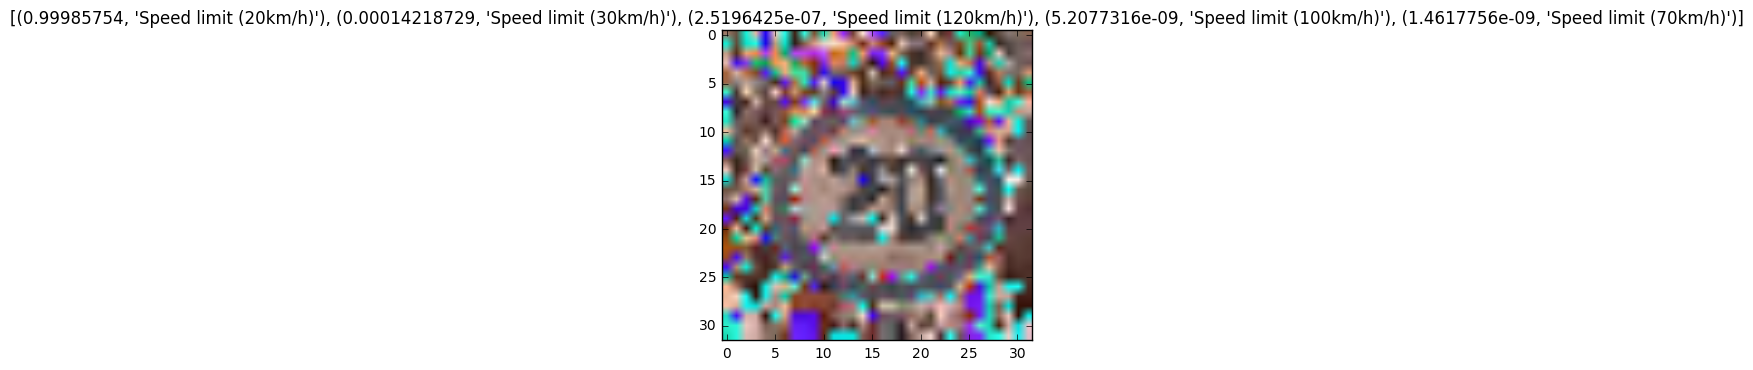

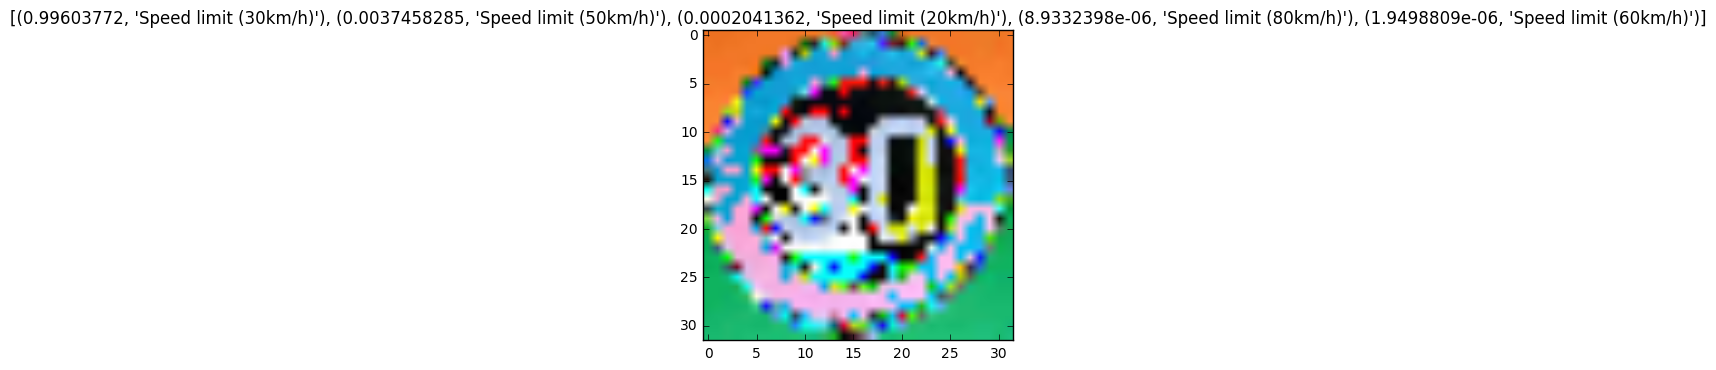

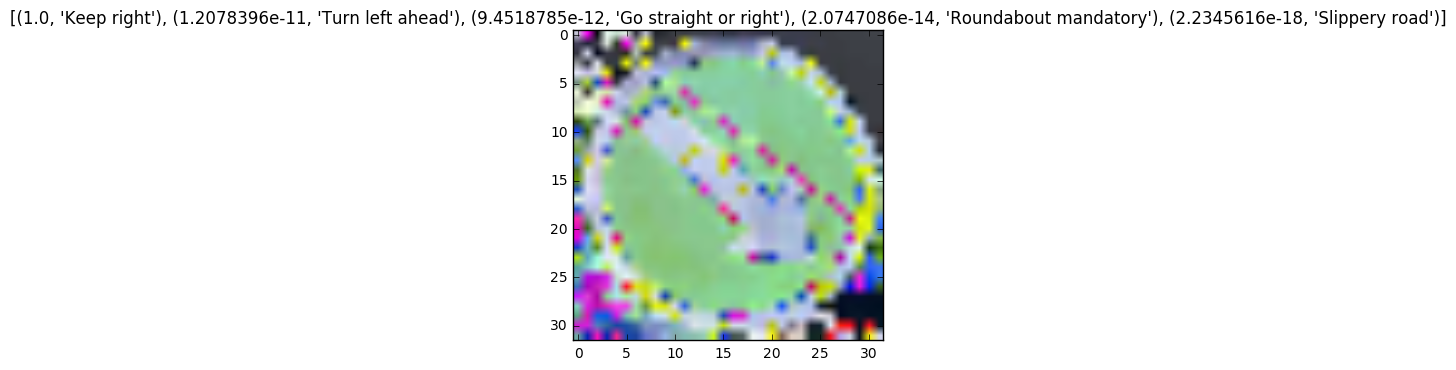

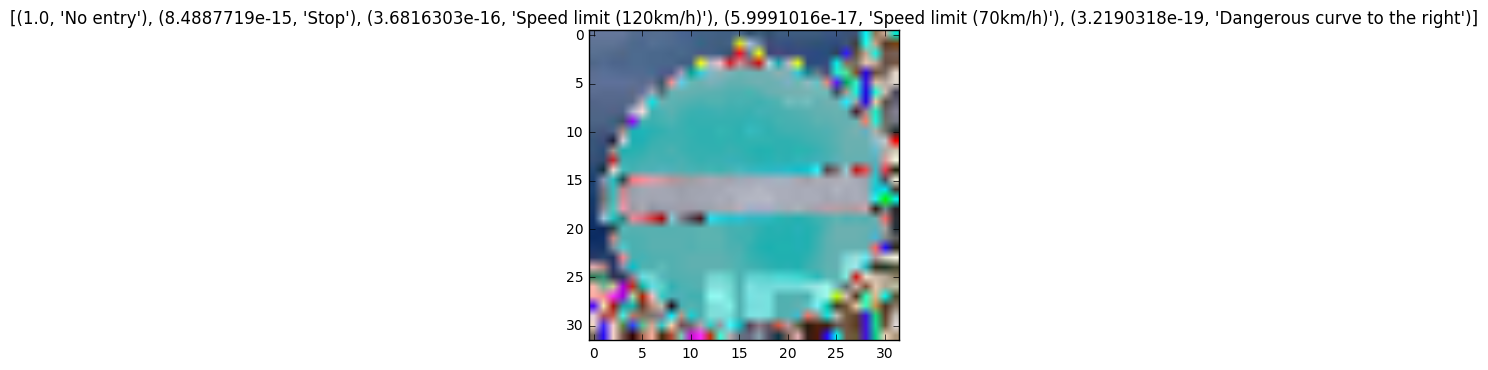

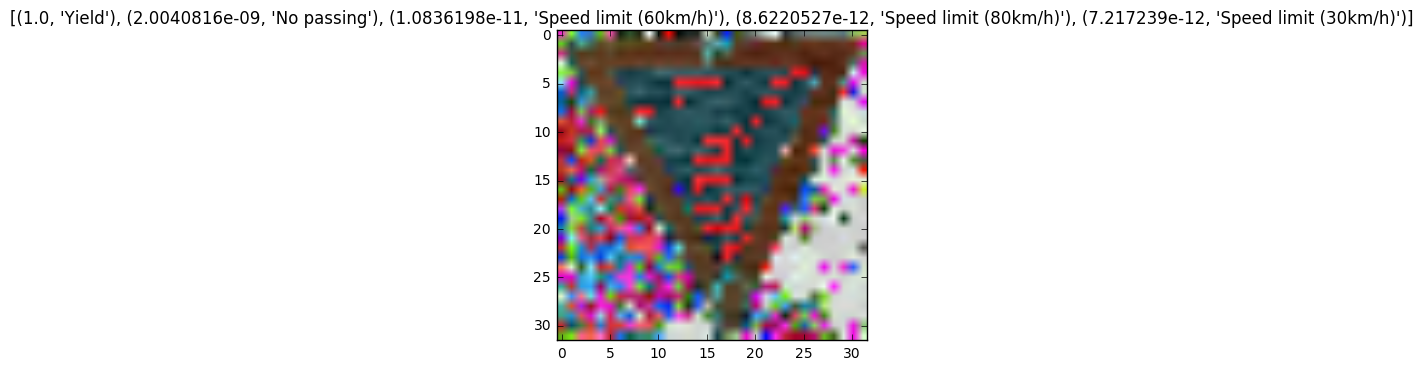

In [16]:
def test_new_images(visualize_images=True):
    path ='new_examples/'
    images = [f for f in os.listdir(path) if '.png' in f]
    images_final = []
    for ix, img_path in enumerate(images):
        img = cv2.imread('{0}{1}'.format(path, img_path))
        img = cv2.resize(img, (32,32))
        img = normalize_images(img)
        img = img[:,:,::-1]
        images_final.append(img)
    prediction = tf.nn.top_k(tf.nn.softmax(logits), k=5)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        loader = tf.train.import_meta_graph('traffic_signs.meta')
        loader.restore(sess, tf.train.latest_checkpoint('./'))
        results = sess.run(prediction, feed_dict={x: images_final, keep_prob: 1.0})
        for ix, result in enumerate(results.values):
            names = results.indices[ix]
            names = [sign_names_df.loc[f]['SignName'] for f in names]
            #result = ["{0:.0f}%".format(f * 100) for f in result]
            tit = list(zip(result, names))
            if visualize_images:
                plt.title(tit)
                plt.imshow(images_final[ix])
                plt.show()

test_new_images()

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

Five above. 

All 5 predicted correctly, but not on random images I found always. I was having issues previously, but I think it was due to watermarks on the images causing problems. Non-watermarked images worked well. I also had to make sure to crop them appropriately.

I think images with watermarks, images that are cropped differently, and images that are not properly represented in the initial dataset all cause problems.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

Looking above, you can see all 5 were predicted correctly.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


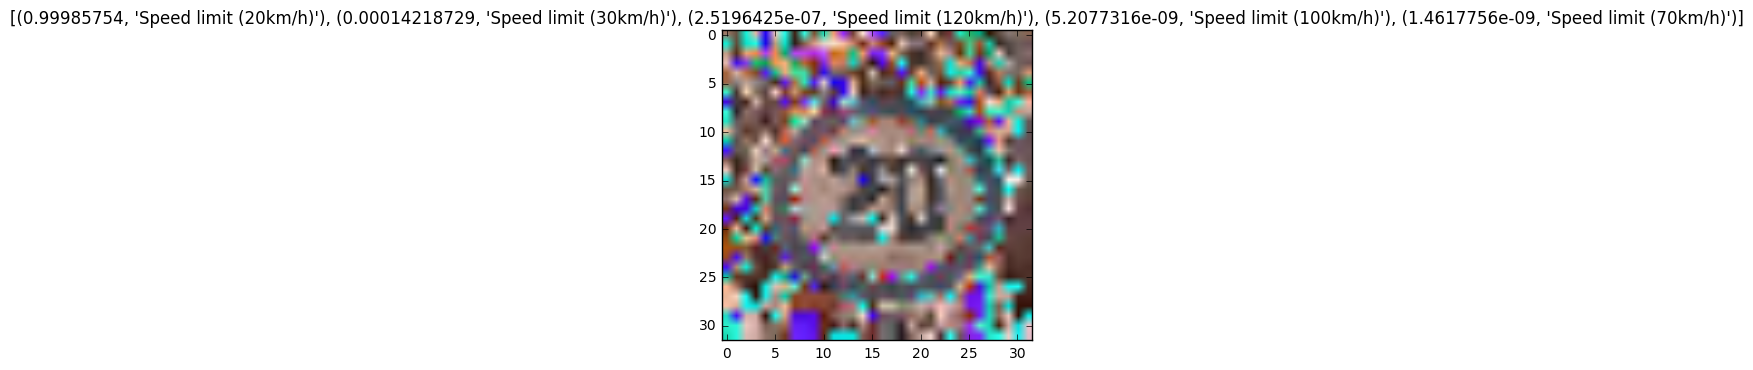

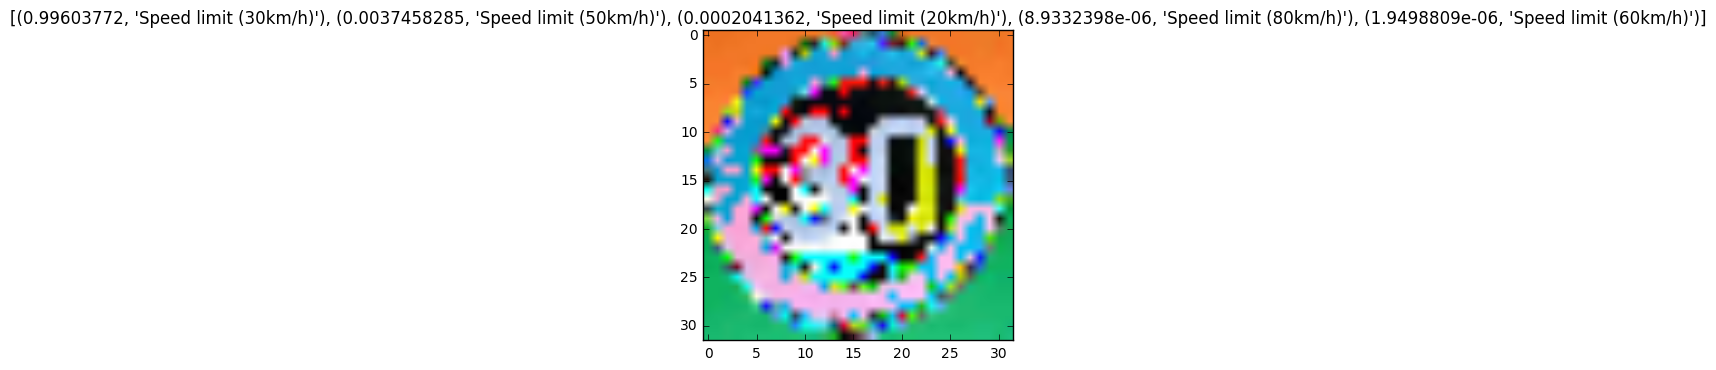

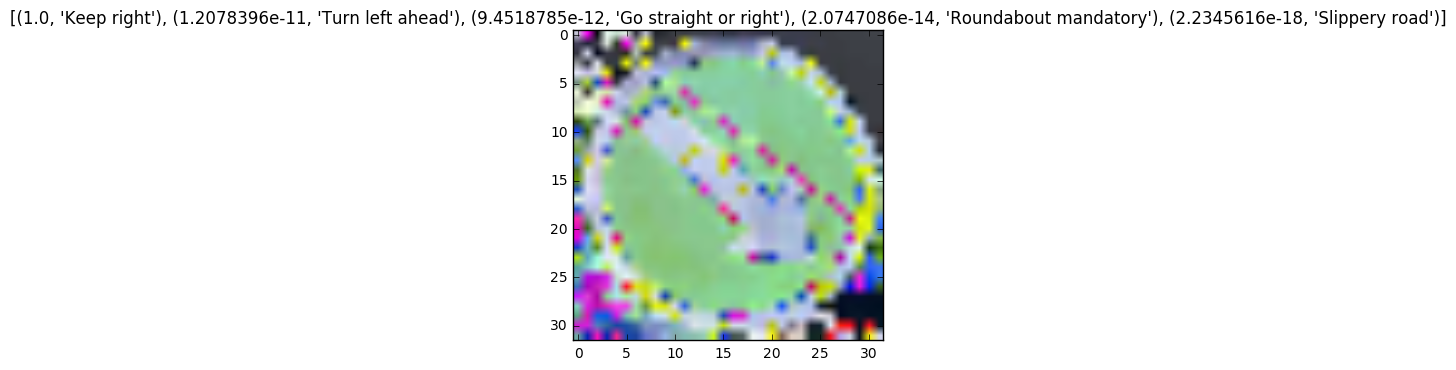

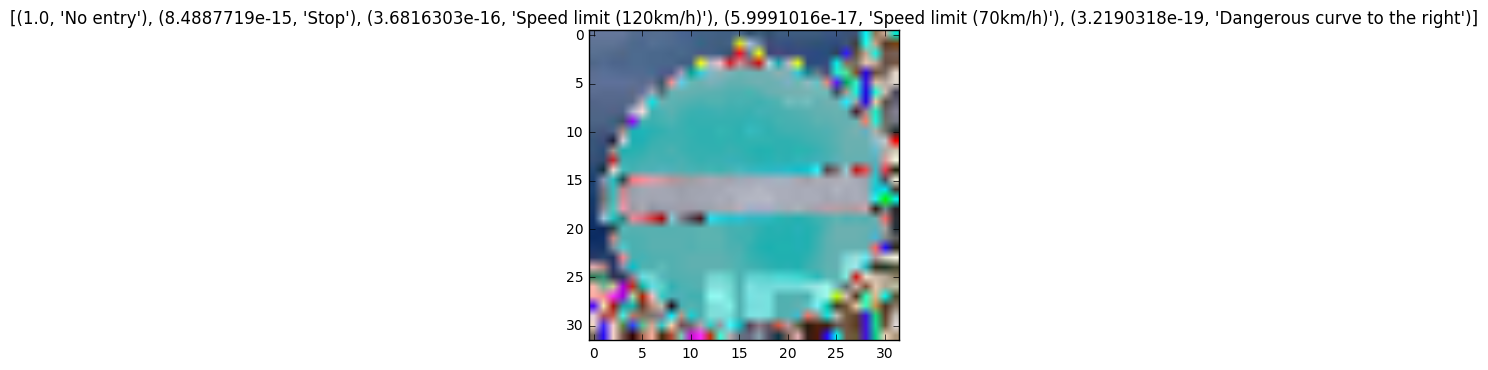

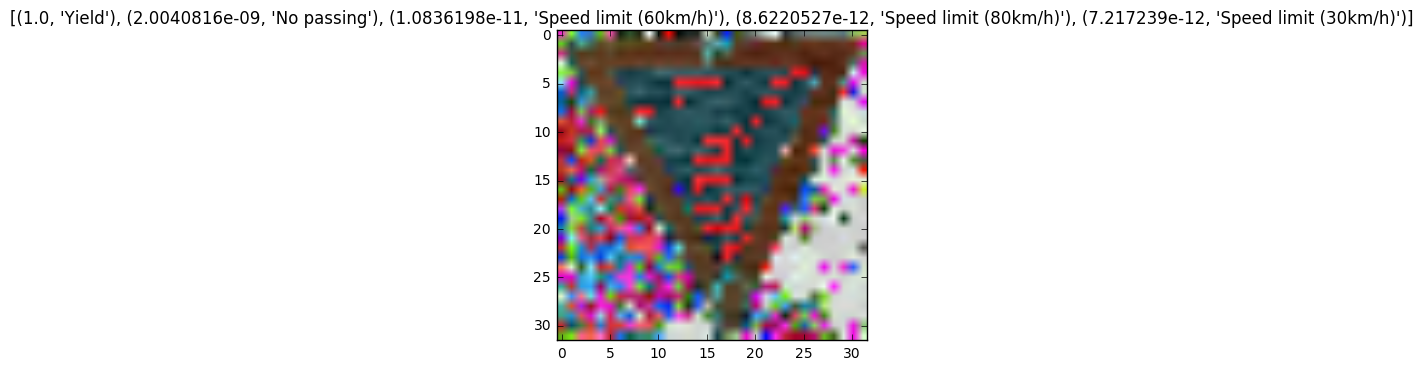

In [19]:
test_new_images()

**Answer:**

In the 5 images above, the model was very certain of every image, and each one was correct.

Like I mentioned above, there were issues with some images I had used previously, but I think it ended up being because of watermarks mostly.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.